# Import modules and Data

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv('./Data/data.csv')

# Data Exploratory

In [2]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

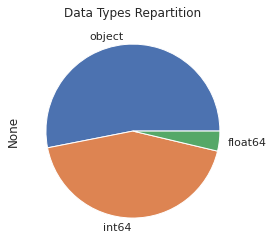

In [5]:
sns.set_theme(style="whitegrid")
df.dtypes.value_counts().plot.pie()
plt.title("Data Types Repartition")
plt.show()

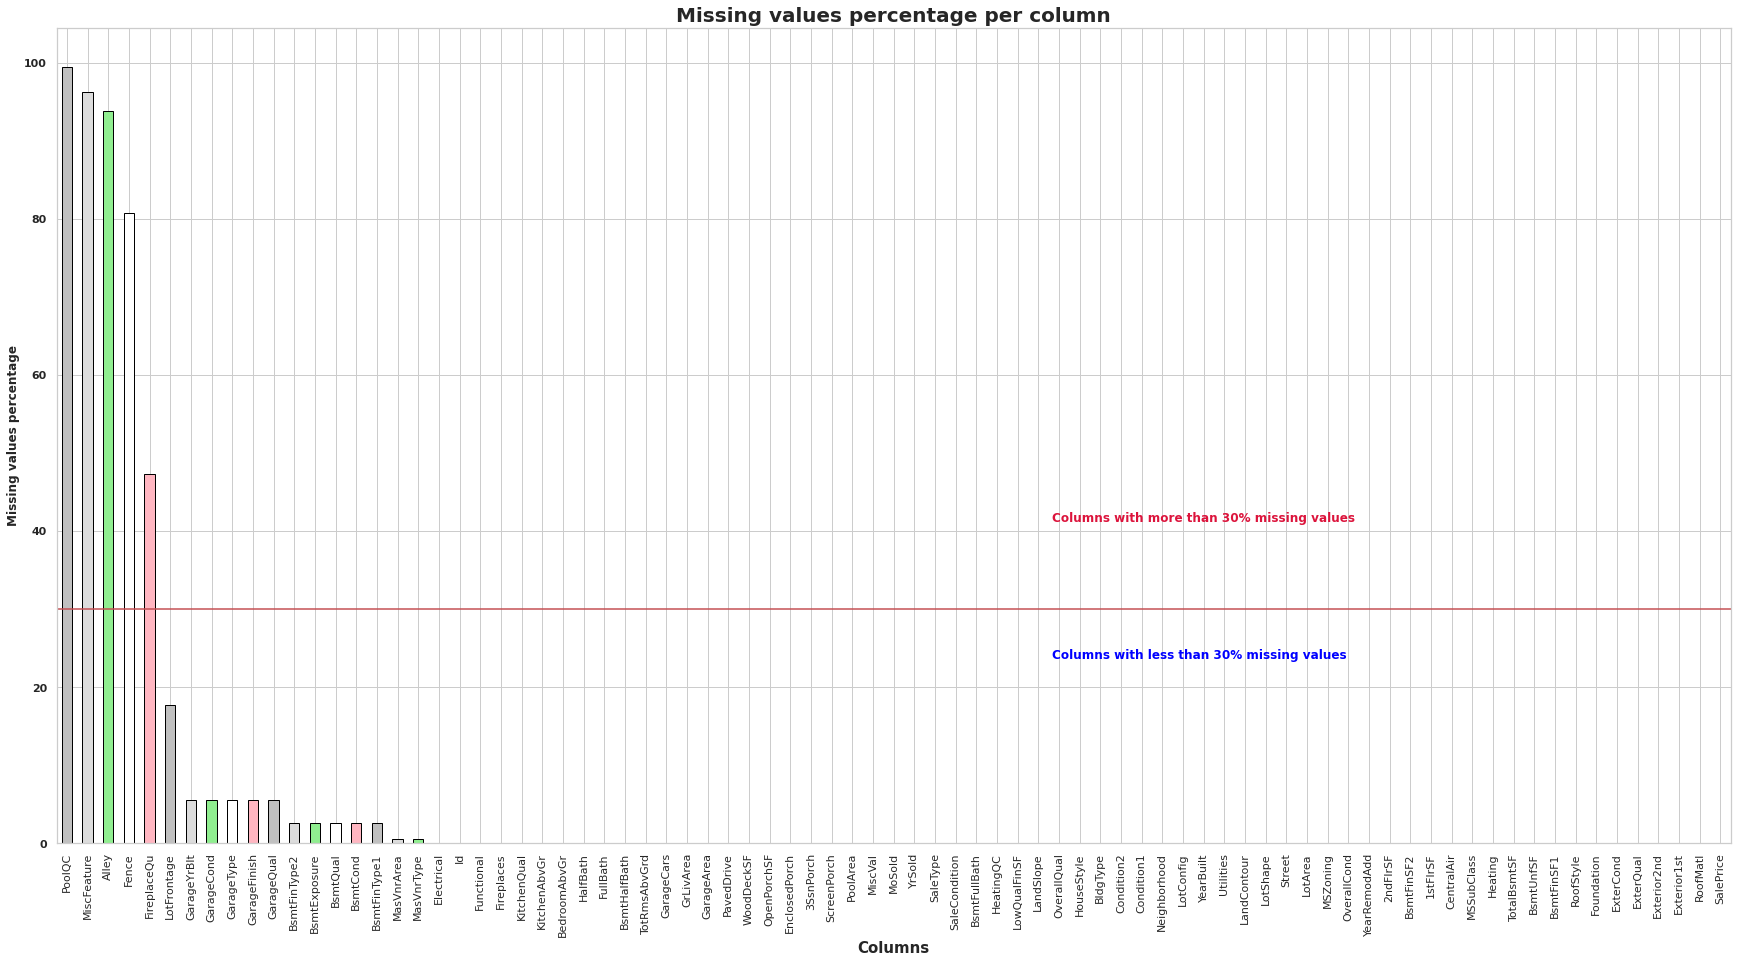

In [6]:
# Functions to display a diagram showing the percent of missing values for each column in a dataframe

def msv1(data, thresh=20, color='black', edgecolor='black', width=30, height=15):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df,30, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

# Data cleaning

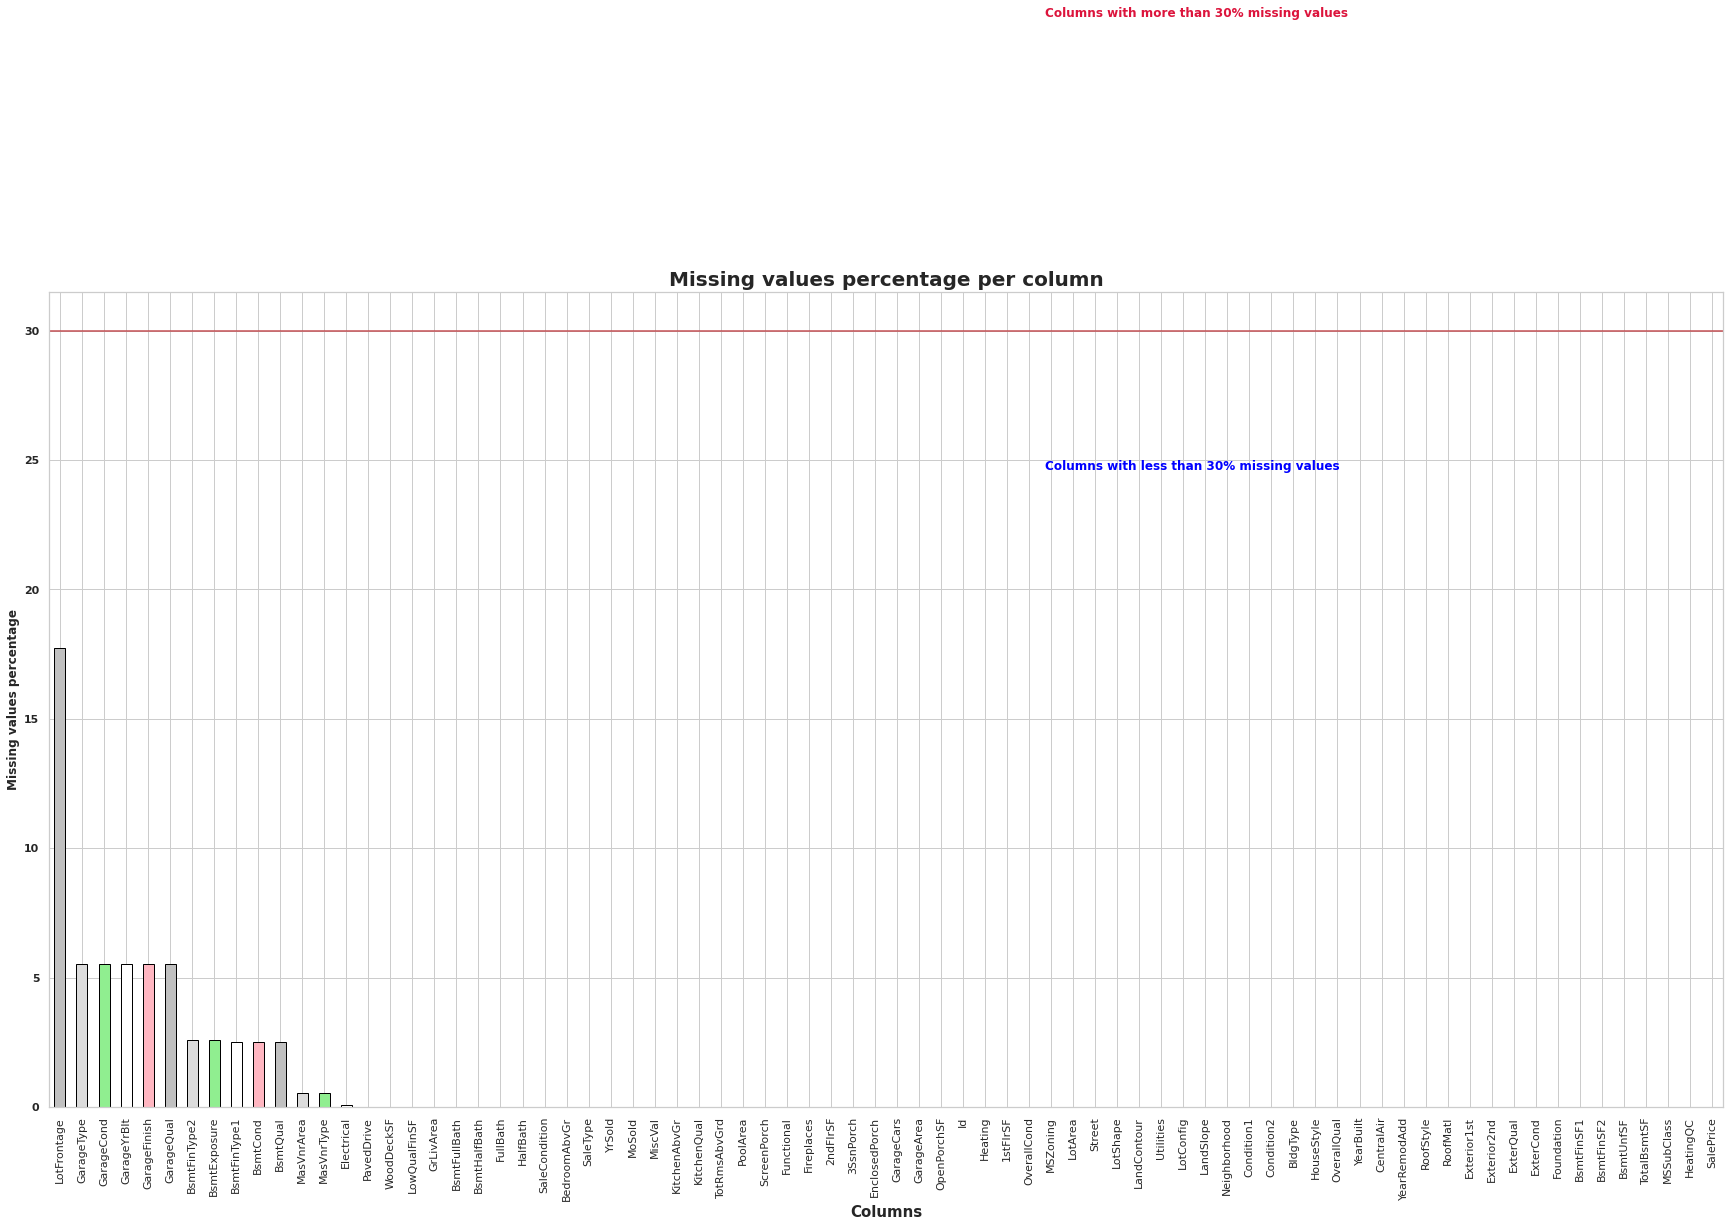

In [7]:
#We drop all values that have less than 70% usable data
df = df.dropna(thresh=(df.shape[0] * 70 / 100), axis=1)
msv1(df,30, color=("silver", "gainsboro", "lightgreen", "white", "lightpink"))

In [8]:
df.shape

(1460, 76)

In [9]:
df['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

# Data visualisation

## Variables quantitatives

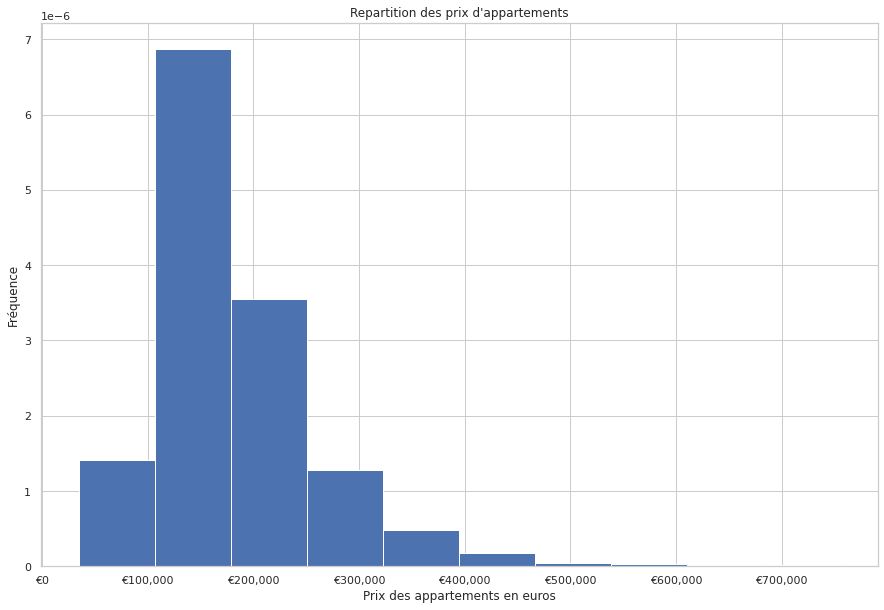

In [10]:
#Import du module mtick
import matplotlib.ticker as mtick
euros_format = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(euros_format)
ax = df['SalePrice'].hist(density=True, bins=10, figsize=(15,10))
ax.xaxis.set_major_formatter(tick)

plt.title('Repartition des prix d\'appartements')
plt.xlabel('Prix des appartements en euros')
plt.ylabel('Fréquence')
plt.show()

D'après ce graphique, on remarque que la plupart des prix des appartements se concentrent autour des 150 000 euros. De façon plus explicite, l'évolution des prix suit une loi normale.

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}

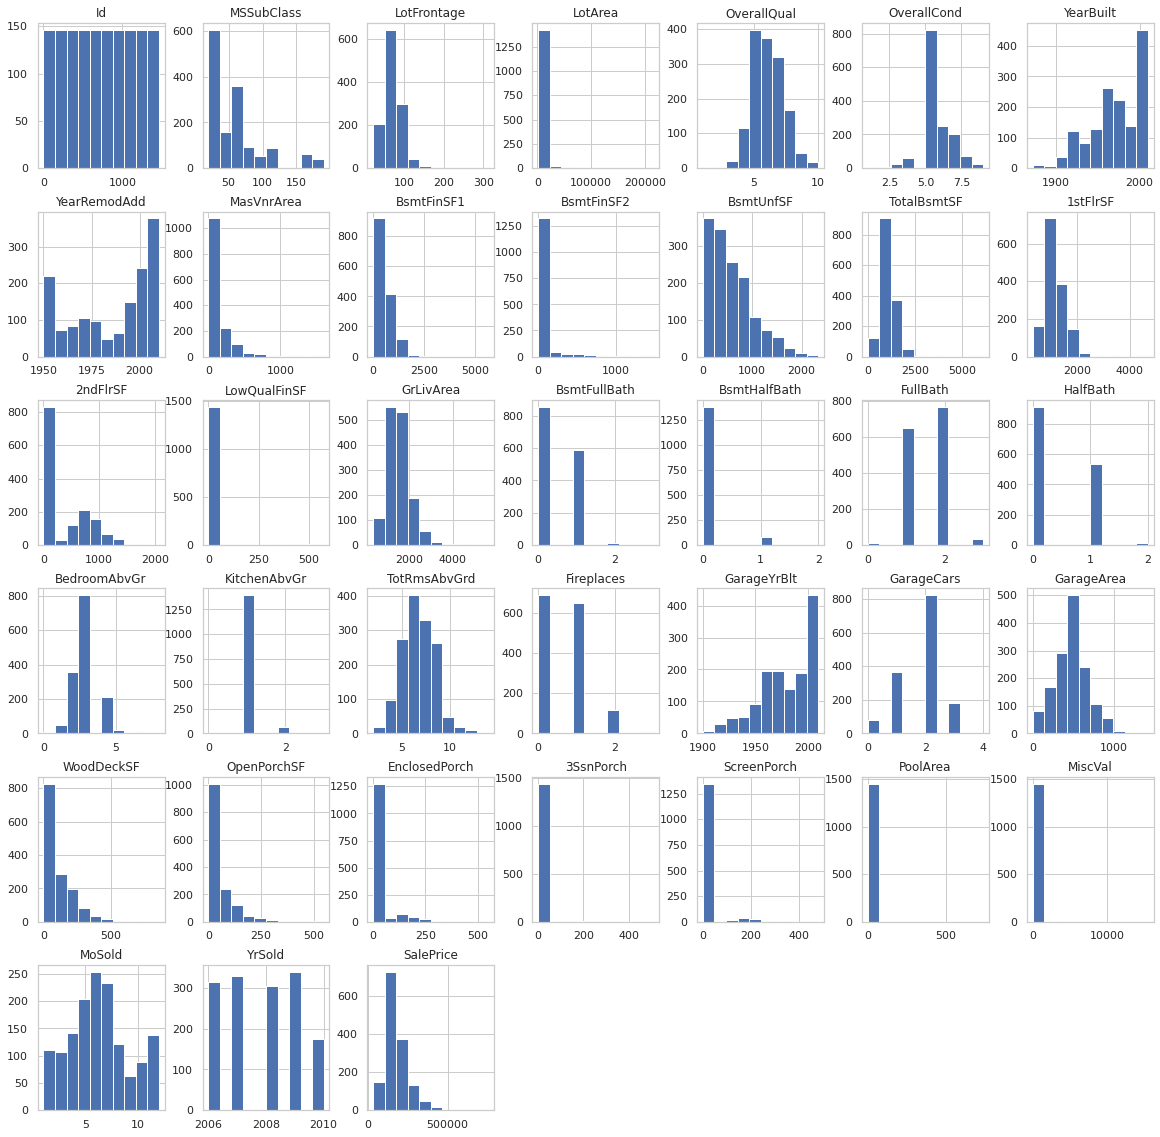

In [11]:
numerics = ["int64", "float64"]

numerics_df = df.select_dtypes(include=numerics)

numerics_df.hist(figsize=(20,20), layout=(6,7))

A part "OverallQual", "SalePrice" et "TotRmsAvGrd", toutes les autres variables ne suivent pas une loi gaussienne.

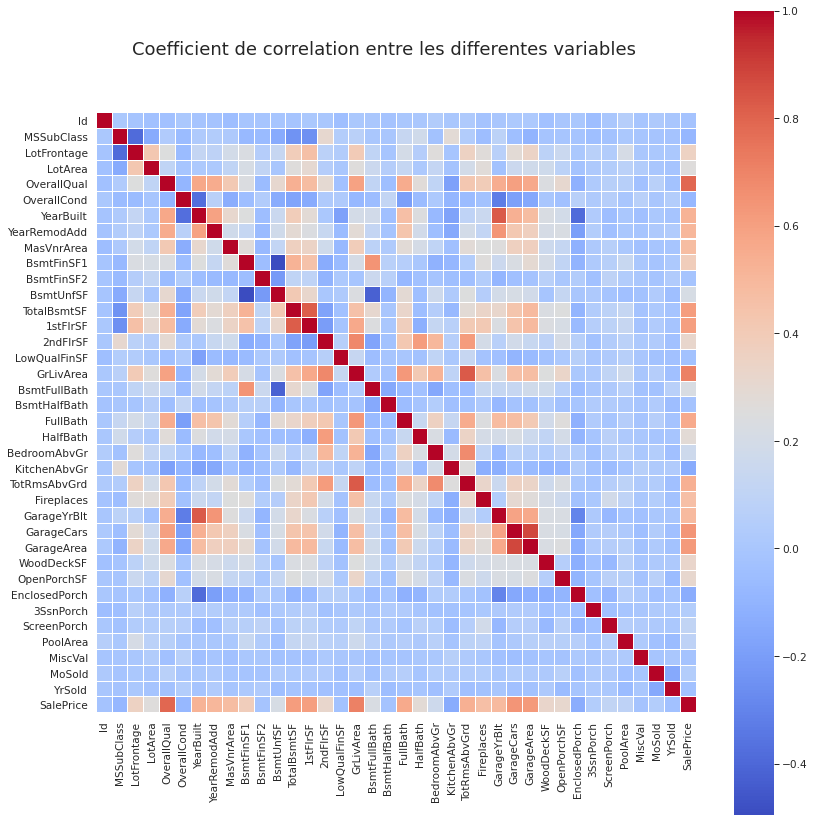

In [12]:
sns.set(context="paper", font_scale= 1.2)
# Compute the correlation matrix for all numeric columns
corrmat = df.corr()
# Size of the plot
f, ax = plt.subplots(figsize=(12,12))
# set the plot heading
f.text(0.45, 0.93, "Coefficient de correlation entre les differentes variables", ha='center', fontsize=18)
# plot matrix as a heatmap
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

Les 3 paires les plus corrélées : 

* TotalBsmtSF et 1stFlrSF
* GarageCars et GarageArea
* SalePrice et OverallQual

In [13]:
df.corr(method="pearson")['SalePrice'].sort_values(ascending=False).head(11)

SalePrice      1.00
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

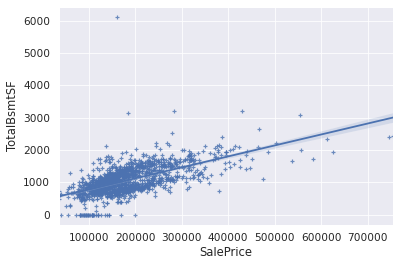

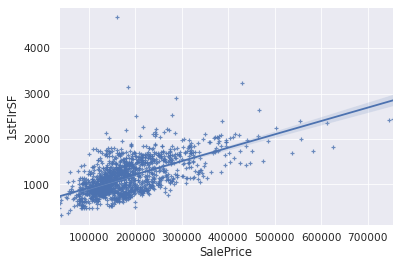

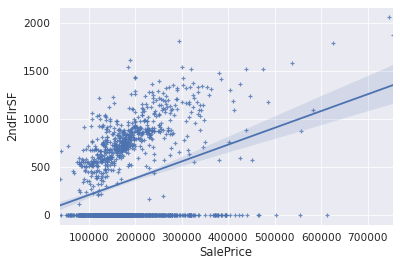

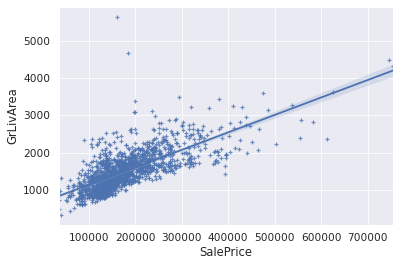

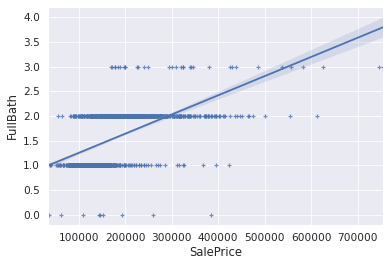

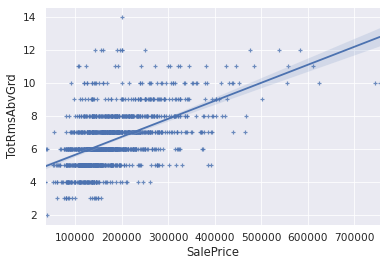

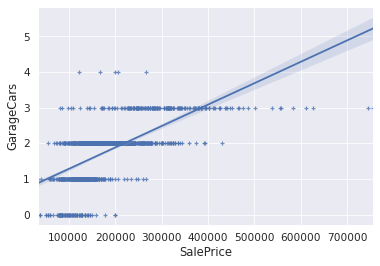

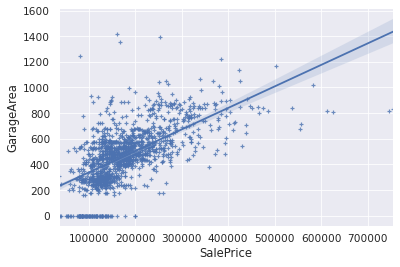

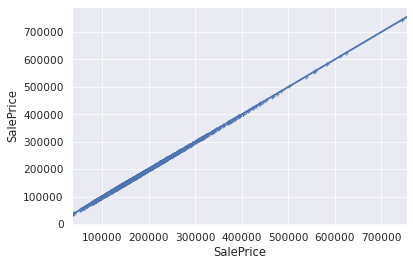

In [14]:
col_list = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

for col in col_list:
    sns.regplot(x="SalePrice", y=col, marker="+", data=df)
    plt.show()

Les graphiques affichant une corrélation forte avec la variable cible(SalePrice) ont tendance a pouvoir être expliqué par une droite. En effet, il existe une droite y = ax + b qui pourrait expliquer ce lien.

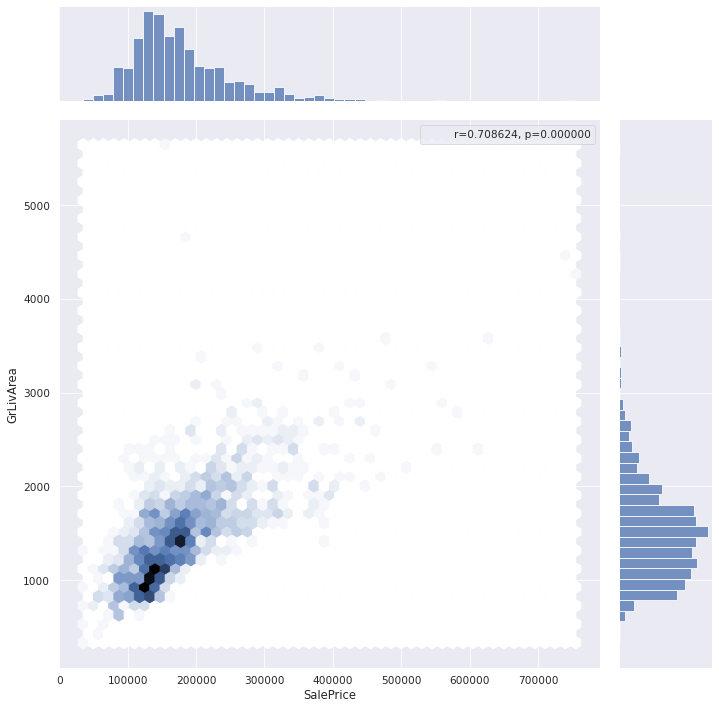

In [15]:
import scipy.stats as stats
g = sns.jointplot(x=df['SalePrice'], y=df['GrLivArea'], kind="hex", height=10)
r, p = stats.pearsonr(df['SalePrice'], df['GrLivArea'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

## Variables qualitatives

### Code permettant d'identifier automatiquement les variables de type Object

In [16]:
objects_df = df.select_dtypes(include="object")
print(list(objects_df))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


### Countplot sur les variables de type catégorielle

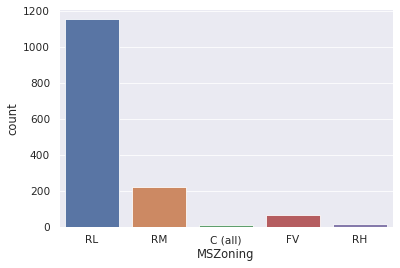

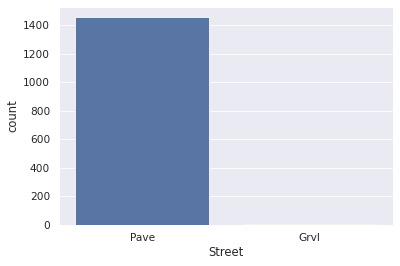

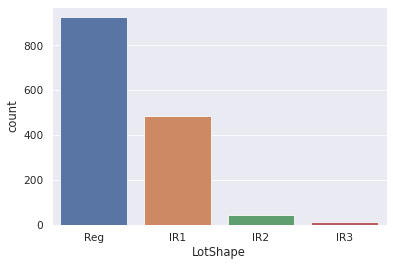

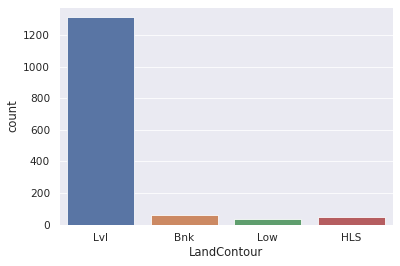

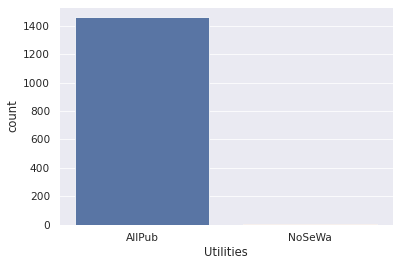

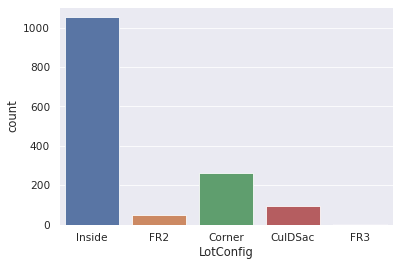

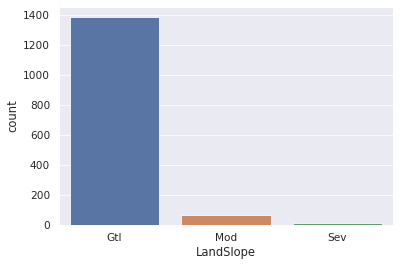

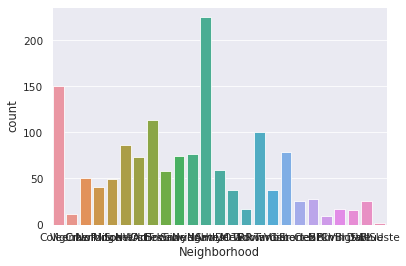

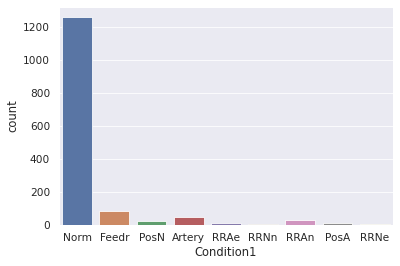

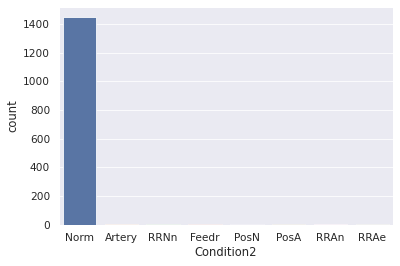

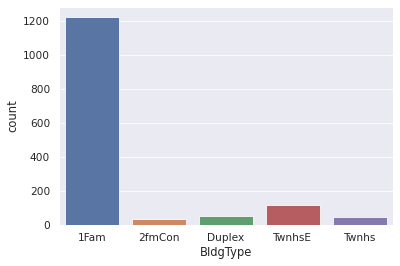

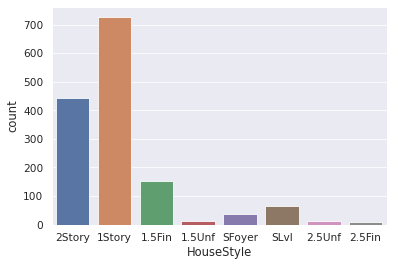

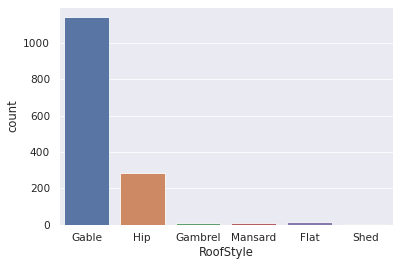

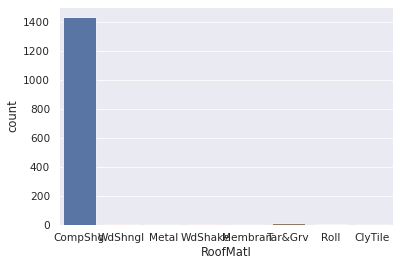

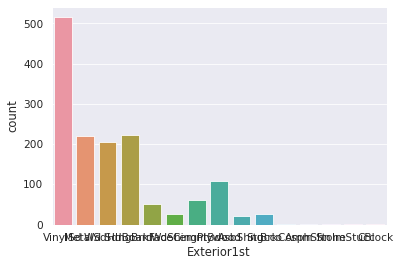

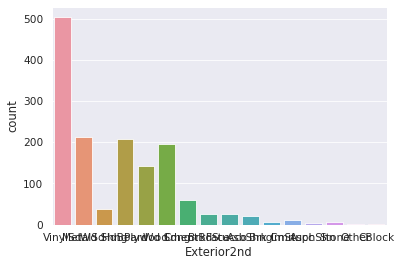

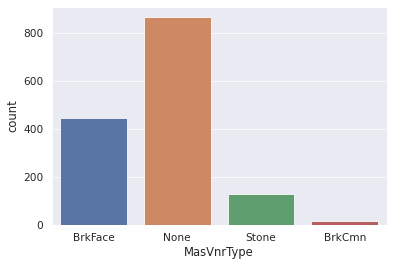

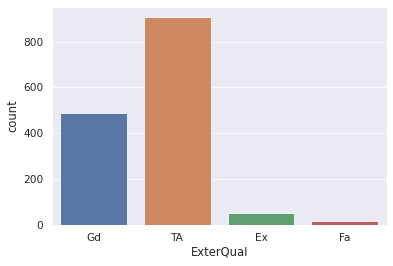

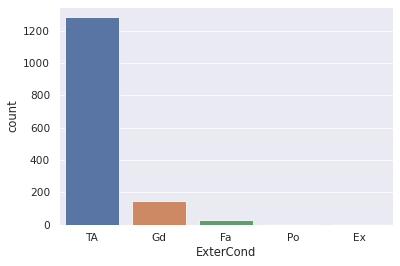

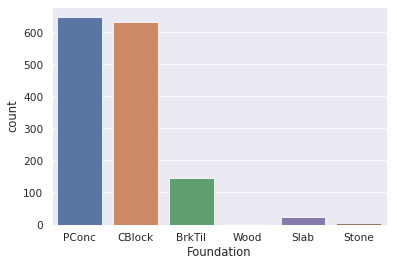

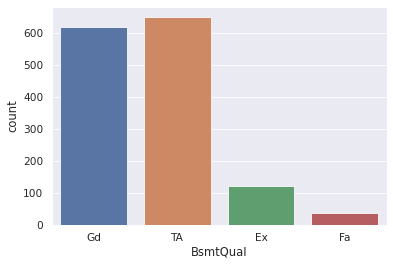

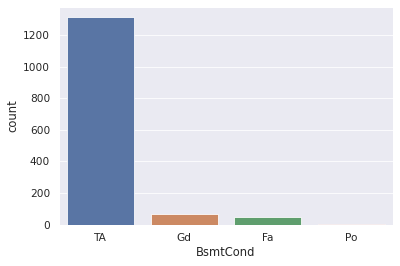

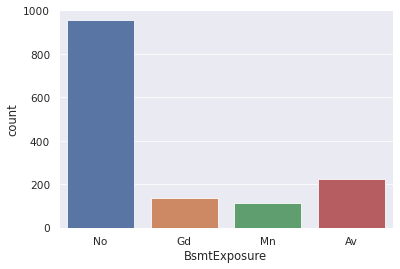

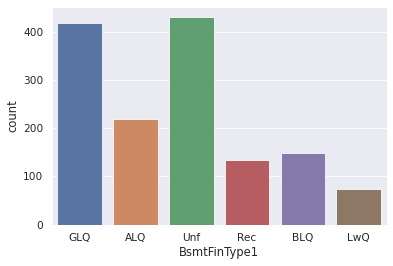

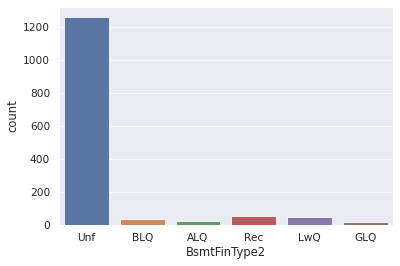

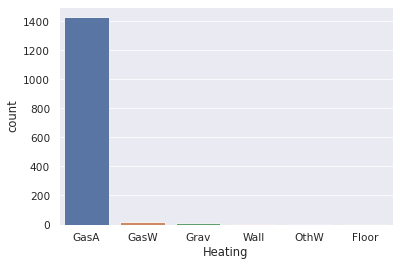

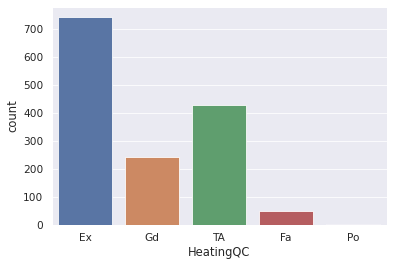

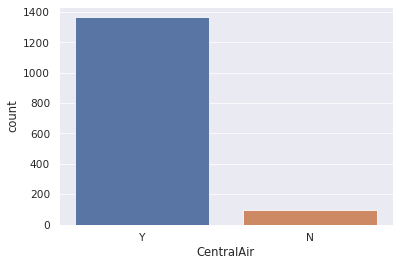

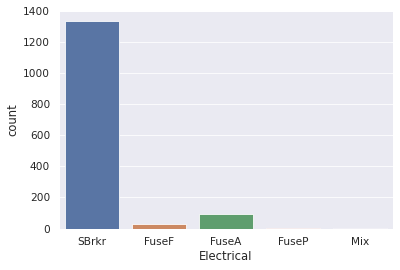

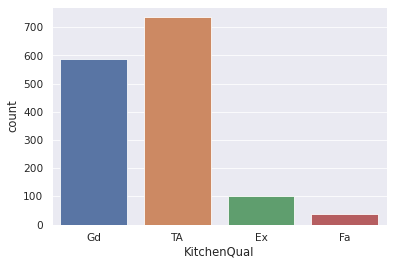

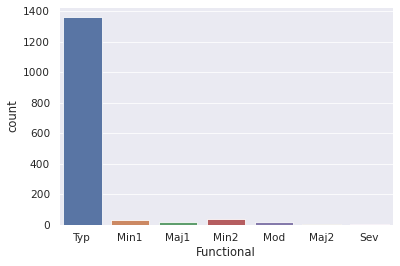

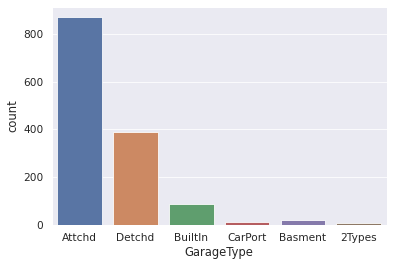

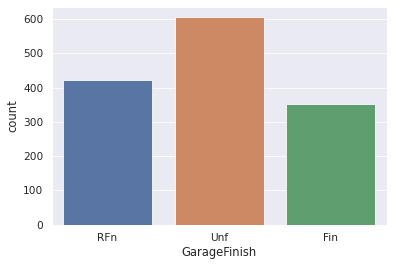

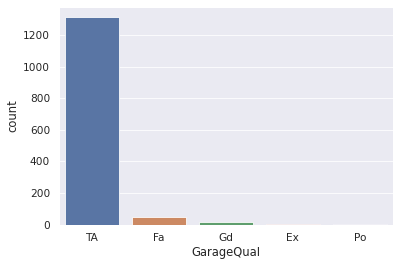

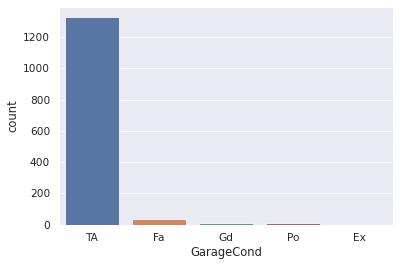

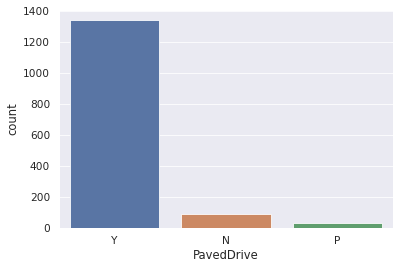

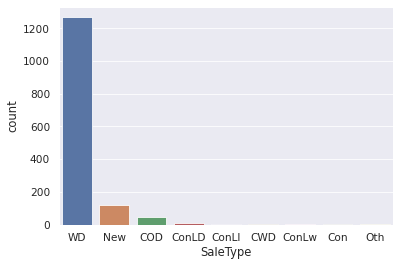

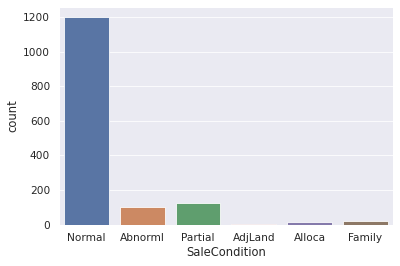

In [17]:
for col in objects_df:
    sns.countplot(x=col, data=df)
    plt.show()

Parmis les variables qualitatives, plusieurs variables sont non pertinentes pour notre analyse. En effet, certaines variables ne contiennent qu'une seule valeur unique et donc sont insignifiantes pour un modèle de machine larning. 

5 Variables qualitatives avec une seule valeur unique majoritaire :
* Utilities
* Condition2
* Heating
* Street
* GarageQual

# Regression Multilinéaire

## Selection de la variable cible et des variables explicatives

In [18]:
"""
SalePrice      1.00
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
"""

y = df['SalePrice']
df_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd"
]

#df_features = numerics_df.columns.drop(['SalePrice', 'Id'])

X = df[df_features]

## Division du jeu de données en training/validation/testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=0.8, random_state=None)

## Apprentissage sur le training set

In [20]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)

[ 1.96866616e+04  4.84585331e+01  1.29306918e+04  1.15547881e+01
  1.70057688e+01  1.71482983e+01 -6.80698538e+03  2.55268742e+02
  2.53376420e+02  3.00497086e+02]


**On peut à présent faire des pédictions sur le prix d'un appartement**

In [21]:
x_to_predict = [10,1739,0,220,1100,820,3,5,1950,1952]

x_df =  pd.DataFrame({
    'var1': [x_to_predict[0]],
    'var2': [x_to_predict[1]],
    'var3': [x_to_predict[2]],
    'var4': [x_to_predict[3]],
    'var5': [x_to_predict[4]],
    'var6': [x_to_predict[5]],
    'var7': [x_to_predict[6]],
    'var8': [x_to_predict[7]],
    'var9': [x_to_predict[8]],
    'var10': [x_to_predict[9]],
})

print("Selon le modèle, le prix du loyer sera de {} € avec le modèle de regression linéaire de Lasso et les éléments renseignés"
      .format(round(reg.predict(x_df)[0])))

Selon le modèle, le prix du loyer sera de 212696 € avec le modèle de regression linéaire de Lasso et les éléments renseignés


## Evaluation du modèle sur le testing set

### Evaluation à partir du R2

In [22]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(y_train, y_train_pred),3), round(r2_score(y_test, y_test_pred),3)))

Pour les données d'entrainement le R2 vaut 0.768 alors que pour les données de test, il est de 0.799


### Evaluation à partir du RMSE

In [23]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(y_train, y_train_pred, squared=False),3), 
              round(mean_squared_error(y_test, y_test_pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 38874.626 alors que pour les données de test, il est de 33207.609


# Regression Linéaire Multiple Lasso

## Selection de la variable cible et des variables explicatives

In [24]:
y = df['SalePrice']
df_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd"
]
X = df[df_features]

## Division du jeu de données en training/validation/testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=0.8, random_state=None)

## Apprentissage sur le training set

In [26]:
reg = Lasso(alpha = 0.1)
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[ 1.99299578e+04  5.15124957e+01  9.94059450e+03  1.99250964e+01
  1.60104694e+01  1.40083675e+01 -5.44017147e+03 -5.30262405e+02
  2.57683942e+02  2.98868017e+02]
-1168155.871856962


**On peut à présent faire des pédictions sur le prix d'un appartement**

In [27]:
x_to_predict = [10,1739,0,220,1100,820,3,5,1950,1952]

x_df =  pd.DataFrame({
    'var1': [x_to_predict[0]],
    'var2': [x_to_predict[1]],
    'var3': [x_to_predict[2]],
    'var4': [x_to_predict[3]],
    'var5': [x_to_predict[4]],
    'var6': [x_to_predict[5]],
    'var7': [x_to_predict[6]],
    'var8': [x_to_predict[7]],
    'var9': [x_to_predict[8]],
    'var10': [x_to_predict[9]],
})

print("Selon le modèle, le prix du loyer sera de {} € avec le modèle de regression linéaire de Lasso et les éléments renseignés"
      .format(round(reg.predict(x_df)[0])))

Selon le modèle, le prix du loyer sera de 221108 € avec le modèle de regression linéaire de Lasso et les éléments renseignés


## Evaluation du modèle sur le testing set

### Evaluation du modèle avec le R2

In [28]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(y_train, y_train_pred),3), round(r2_score(y_test, y_test_pred),3)))

Pour les données d'entrainement le R2 vaut 0.767 alors que pour les données de test, il est de 0.801


### Evaluation du modèle avec le RMSE

In [29]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(y_train, y_train_pred, squared=False),3), 
              round(mean_squared_error(y_test, y_test_pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 38620.566 alors que pour les données de test, il est de 34401.033


# Regression Linéaire Multiple Ridge

## Selection de la variable cible et des variables explicatives

In [30]:
y = df['SalePrice']
df_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd"
]


## Division du jeu de données en training/validation/testing sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=0.8, random_state=None)

## Apprentissage sur le training set

In [32]:
reg = Ridge(alpha = 0.5)
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[ 1.99796722e+04  4.51337165e+01  1.00331962e+04  2.17097108e+01
  1.18059683e+01  1.43729063e+01 -7.18498569e+03  6.62765098e+02
  2.97007881e+02  2.88075685e+02]
-1217631.3546631748


**On peut à présent faire des pédictions sur le prix d'un appartement**

In [33]:
x_to_predict = [10,1739,0,220,1100,820,3,5,1950,1952]

x_df =  pd.DataFrame({
    'var1': [x_to_predict[0]],
    'var2': [x_to_predict[1]],
    'var3': [x_to_predict[2]],
    'var4': [x_to_predict[3]],
    'var5': [x_to_predict[4]],
    'var6': [x_to_predict[5]],
    'var7': [x_to_predict[6]],
    'var8': [x_to_predict[7]],
    'var9': [x_to_predict[8]],
    'var10': [x_to_predict[9]],
})

print("Selon le modèle, le prix du loyer sera de {} € avec le modèle de regression linéaire de Ridge et les éléments renseignés"
      .format(round(reg.predict(x_df)[0])))

Selon le modèle, le prix du loyer sera de 213449 € avec le modèle de regression linéaire de Ridge et les éléments renseignés


## Evaluation du modèle sur le testing set

### Evaluation du modèle avec le R2

In [34]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(y_train, y_train_pred),3), round(r2_score(y_test, y_test_pred),3)))

Pour les données d'entrainement le R2 vaut 0.77 alors que pour les données de test, il est de 0.77


### Evaluation du modèle avec RMSE

In [35]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(y_train, y_train_pred, squared=False),3), 
              round(mean_squared_error(y_test, y_test_pred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 36548.662 alors que pour les données de test, il est de 43439.964


# Regression Linéaire avec des variables catégorielles

## Selection de la variable cible et des variables explicatives

In [36]:
df = df.dropna()
y = df['SalePrice']
X = df.drop('SalePrice', axis='columns')


In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def get_nb_categories(df):
    #First we get all columns in our dataset that are object type
    obj_type_df = df.select_dtypes(include="object")
    # Then for each columns in obj_type_df, we count the number of differents categories
    for col in obj_type_df:
        print(col, ': ', len(obj_type_df[col].unique()), ' labels')


column_trans = make_column_transformer(
   (OneHotEncoder(), list(X.select_dtypes(include="object"))),
   remainder="passthrough"
)

X = column_trans.fit_transform(X)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, train_size=0.8, random_state=None)


In [39]:
reg = Lasso(alpha = 1, max_iter=10000)
reg.fit(X_train,y_train)

Lasso(alpha=1, max_iter=10000)

In [40]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(y_train, y_train_pred),3), round(r2_score(y_test, y_test_pred),3)))

Pour les données d'entrainement le R2 vaut 0.937 alors que pour les données de test, il est de 0.653


In [41]:
df.shape

(1094, 76)

## Cross validation 

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(Lasso(alpha = 2, max_iter=10000), X_train, y_train, cv=5).mean()

0.836496382514546

In [45]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'alpha': np.arange(1,20)
}

grid = GridSearchCV(Lasso(max_iter=10000), params_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
model = grid.best_estimator_
model.score(X_test,y_test)

0.7600692530083827

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'alpha' : np.arange(1,50)
}

rand = RandomizedSearchCV(Ridge(), params, cv=10, n_iter = 50, random_state=5)
rand.fit(X,y)
df_results = pd.DataFrame(rand.cv_results_)
df_results

/home/apprenant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 49 is smaller than n_iter=50. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.01,0.00,0.00,0.00,1,{'alpha': 1},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,3
1,0.01,0.00,0.00,0.00,2,{'alpha': 2},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,33
2,0.01,0.00,0.00,0.00,3,{'alpha': 3},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,32
3,0.01,0.00,0.00,0.00,4,{'alpha': 4},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,18
4,0.01,0.00,0.00,0.00,5,{'alpha': 5},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,25
5,0.01,0.00,0.00,0.00,6,{'alpha': 6},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,46
6,0.01,0.00,0.00,0.00,7,{'alpha': 7},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,49
7,0.01,0.00,0.00,0.00,8,{'alpha': 8},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,47
8,0.01,0.00,0.00,0.00,9,{'alpha': 9},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,31
9,0.01,0.00,0.00,0.00,10,{'alpha': 10},0.77,0.76,0.82,0.59,0.79,0.80,0.77,0.75,0.23,0.77,0.70,0.17,43


In [ ]:
rand.best_params_

{'alpha': 13}